Comparing Two Samples 

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

births=pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/baby.csv")
births

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


In [97]:
smoking_and_birthweight = births[['Maternal Smoker','Birth Weight']]
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [3]:
smoking_and_birthweight.groupby(by='Maternal Smoker').count()

,Birth Weight
Maternal Smoker,
False,715
True,459


In [4]:
out1= smoking_and_birthweight[smoking_and_birthweight["Maternal Smoker"]==True]
out1

,Maternal Smoker,Birth Weight
2,True,128
3,True,108
8,True,143
10,True,144
11,True,141
...,...,...
1162,True,143
1163,True,113
1164,True,109
1165,True,103


In [5]:
out2=smoking_and_birthweight[smoking_and_birthweight['Maternal Smoker']==False]
out2

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
4,False,136
5,False,138
6,False,132
...,...,...
1168,False,132
1169,False,113
1170,False,128
1172,False,125


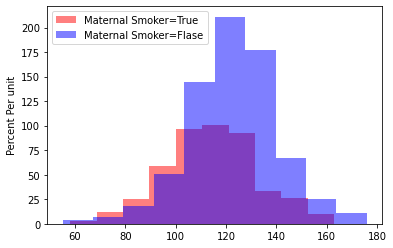

In [13]:
plt.hist(out1['Birth Weight'],color='red',alpha=0.5)
plt.hist(out2['Birth Weight'],color='blue',alpha=0.5)
plt.ylabel("Percent Per unit")
plt.legend(["Maternal Smoker=True","Maternal Smoker=Flase"])
#plt.legend("False")
plt.show()

Test Statistic

In [12]:
means_table = smoking_and_birthweight.groupby(by='Maternal Smoker').mean()
means_table

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


In [29]:
observed_difference =means_table.iloc[1,0]-means_table.iloc[0,0]
observed_difference

-9.266142572024918

In [229]:
def difference_of_means(table, label, group_label):
    reduced = table[[label, group_label]]
    means_table1 = reduced.groupby(by=group_label).mean()   
    return means_table1.iloc[1,0]-means_table1.iloc[0,0]

In [37]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

Predicting the Statistic Under the Null Hypothesis 

In [98]:
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [243]:
shuffled_labels = smoking_and_birthweight['Maternal Smoker'].sample(frac=1).reset_index(drop=True)
smoking_and_birthweight["Shuffled Labels"]=shuffled_labels
original_and_shuffled=smoking_and_birthweight.loc[:,['Maternal Smoker','Birth Weight','Shuffled Labels']]
original_and_shuffled
                        
#shuffled_labels

<ipython-input-243-44e09650e6b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoking_and_birthweight["Shuffled Labels"]=shuffled_labels


,Maternal Smoker,Birth Weight,Shuffled Labels
0,False,120,False
1,False,113,False
2,True,128,True
3,True,108,False
4,False,136,False
...,...,...,...
1169,False,113,False
1170,False,128,False
1171,True,130,True
1172,False,125,False


In [244]:
shuffled_only = original_and_shuffled.drop(columns='Maternal Smoker')
shuffled_group_means = shuffled_only.groupby(by='Shuffled Labels').mean()
shuffled_group_means

,Birth Weight
Shuffled Labels,
False,119.471329
True,119.448802


In [245]:
#shuffled_group_means = shuffled_only.groupby(by='Shuffled Labels').count()
#shuffled_group_means

In [246]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Labels')

-0.022526928409291713

In [210]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

In [281]:
###
def one_simulated_difference(table, label, group_label):
    table=table[[label,group_label]]
    shuffled_labels = table[group_label].sample(frac=1).reset_index(drop=True)
    table["Shuffled Labels"]=shuffled_labels 
    shuffled_table=table
    return difference_of_means(shuffled_table, label, 'Shuffled Labels')   

In [267]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

<ipython-input-266-970ccb61c76b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table["Shuffled Labels"]=shuffled_labels


-0.07618568795038527

In [282]:
differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)                               

<ipython-input-281-b9b3789be2b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table["Shuffled Labels"]=shuffled_labels


In [271]:
#differences

Observed Difference: -9.266142572024918


Text(0.5, 1.0, 'Prediction Under the Null Hypothesis')

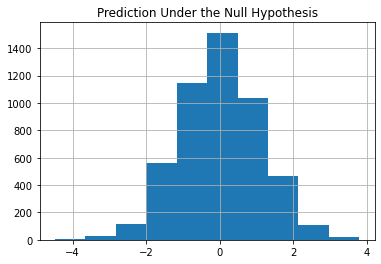

In [270]:
#differences=list(differences)
pd.DataFrame({'Difference Between Group Means': differences}).hist()
print('Observed Difference:', observed_difference)
plt.title('Prediction Under the Null Hypothesis')

In [272]:
empirical_P = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_P

0.0

Another Permutation Test 

In [273]:
smoking_and_age = births[['Maternal Smoker', 'Maternal Age']]
smoking_and_age
#smoking_and_age.hist('Maternal Age', group = 'Maternal Smoker')

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


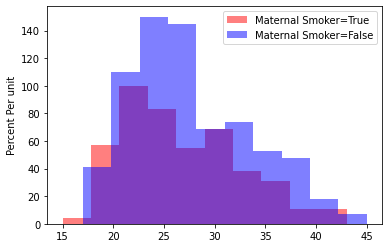

In [274]:
out11= smoking_and_age[smoking_and_age["Maternal Smoker"]==True]
out22= smoking_and_age[smoking_and_age["Maternal Smoker"]==False]
plt.hist(out11['Maternal Age'],color='red',alpha=0.5)
plt.hist(out22['Maternal Age'],color='blue',alpha=0.5)
plt.ylabel("Percent Per unit")
plt.legend(["Maternal Smoker=True","Maternal Smoker=False"])
#plt.legend("False")
plt.show()

In [275]:
observed_age_difference = difference_of_means(births, 'Maternal Age', 'Maternal Smoker')
observed_age_difference

-0.8076725017901509

In [276]:
age_differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(births, 'Maternal Age', 'Maternal Smoker')
    age_differences = np.append(age_differences, new_difference)

<ipython-input-266-970ccb61c76b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table["Shuffled Labels"]=shuffled_labels


In [277]:
age_differences.min()

-1.1689748160336393

Observed Difference: -0.8076725017901509


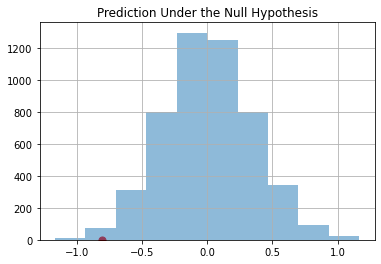

In [279]:
pd.DataFrame({'Difference Between Group Means': age_differences}).hist(alpha=0.5)
plt.scatter(observed_age_difference, 0, color='red', s=50)
plt.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_age_difference)

In [280]:
empirical_P = np.count_nonzero(age_differences <= observed_age_difference) / 5000
empirical_P

0.007